# Training Several Different Linear Models (Full Dataset)

## Testing model training - basics

### LinearRegression - Training model on Numerical Columns only --> Low Score 0.29

In [1]:
import pandas as pd
import numpy as np

In [2]:
postcodes = pd.read_csv('data/zipcode-belgium.csv')
postcodes = postcodes.drop(columns=['lat', 'long'])
postcodes.head()

,postcode,locality
0,1000,Bruxelles
1,1020,Laeken
2,1030,Schaerbeek
3,1040,Etterbeek
4,1050,Ixelles


In [3]:
df = pd.read_csv('data/cleaned.csv').drop('Unnamed: 0', axis=1)
df.drop_duplicates()

numerical_cols = ['price','number_rooms', 'living_area', 'fireplace', 'furnished', 'terrace', 'garden', 'terrace_area', 'garden_area', 'surface_land', 'number_facades', 'swimming_pool', 'latitude', 'longitude']
cat_cols = ['property_type','property_subtype','kitchen','building_state','region','province','locality', 'postcode']

In [4]:
postalcode_merge_df = pd.merge(postcodes, df, on='locality', how='left')
postalcode_merge_df.drop_duplicates()

df = postalcode_merge_df.dropna()
df.head(500)

,postcode,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,...,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,region,province,latitude,longitude
0,1000,Bruxelles,HOUSE,HOUSE,698000.0,3.0,200.0,USA_HYPER_EQUIPPED,0.0,0.0,...,1.0,500.0,600.0,4.0,0.0,AS_NEW,Brussels,Brussels,50.846557,4.351697
1,1000,Bruxelles,HOUSE,VILLA,650000.0,4.0,270.0,SEMI_EQUIPPED,0.0,0.0,...,1.0,300.0,713.0,4.0,0.0,TO_RENOVATE,Brussels,Brussels,50.846557,4.351697
2,1000,Bruxelles,HOUSE,HOUSE,499000.0,4.0,155.0,HYPER_EQUIPPED,0.0,0.0,...,1.0,75.0,210.0,2.0,0.0,GOOD,Brussels,Brussels,50.846557,4.351697
3,1000,Bruxelles,APARTMENT,APARTMENT,385000.0,2.0,88.0,USA_INSTALLED,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,GOOD,Brussels,Brussels,50.846557,4.351697
4,1000,Bruxelles,APARTMENT,APARTMENT,365000.0,5.0,134.0,INSTALLED,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,GOOD,Brussels,Brussels,50.846557,4.351697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1080,Molenbeek-Saint-Jean,APARTMENT,APARTMENT,174000.0,1.0,65.0,NOT_DEFINED,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,GOOD,Brussels,Brussels,50.854596,4.338636
496,1080,Molenbeek-Saint-Jean,HOUSE,APARTMENT_BLOCK,599000.0,5.0,300.0,HYPER_EQUIPPED,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,AS_NEW,Brussels,Brussels,50.854596,4.338636
497,1080,Molenbeek-Saint-Jean,HOUSE,APARTMENT_BLOCK,699000.0,4.0,160.0,NOT_DEFINED,0.0,0.0,...,0.0,0.0,500.0,2.0,0.0,UNKNOWN,Brussels,Brussels,50.854596,4.338636
498,1080,Molenbeek-Saint-Jean,APARTMENT,APARTMENT,249000.0,2.0,100.0,INSTALLED,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,UNKNOWN,Brussels,Brussels,50.854596,4.338636


In [5]:
df.columns
df.isna().sum()

postcode            0
locality            0
property_type       0
property_subtype    0
price               0
number_rooms        0
living_area         0
kitchen             0
furnished           0
fireplace           0
terrace             0
terrace_area        0
garden              0
garden_area         0
surface_land        0
number_facades      0
swimming_pool       0
building_state      0
region              0
province            0
latitude            0
longitude           0
dtype: int64

In [6]:
X = df[numerical_cols].drop(columns=['price'], axis=1)
y = df['price']

Mean absolute error TEST = 104710.9057

Mean squared error TEST = 19800474035.9891

Median absolute error TEST = 81523.7363

Explain variance score TEST = 0.3249

R2 score *coefficient of Determination TEST = 0.3248

--------------------------------------
TRAINING SCORE: 0.3198685017112771
TESTING SCORE: 0.32475497377237195
--------------------------------------
Cross validation scores: 
 [0.33823876 0.27383638 0.32504117 0.35482298 0.31453265 0.25480414
 0.28682168 0.35608365 0.35244576 0.278701  ]


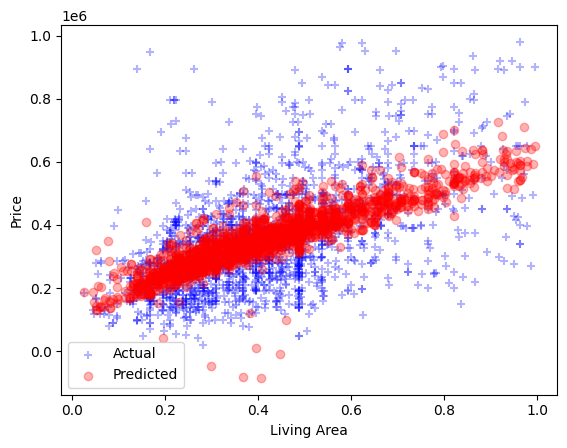

In [7]:
from src.model_functions import train_linear_regr

train_linear_regr(X, y)

### Dropping less correlated numerical columns

In [8]:
df[numerical_cols].corr()['price'].sort_values(ascending=False)

price             1.000000
living_area       0.520740
number_rooms      0.409525
surface_land      0.237257
number_facades    0.175345
fireplace         0.136150
garden            0.134182
terrace_area      0.117371
terrace           0.113510
swimming_pool     0.096904
garden_area       0.092524
latitude          0.007480
furnished        -0.004397
longitude        -0.068915
Name: price, dtype: float64

In [9]:
numerical_cols = ['price','number_rooms', 'living_area', 'surface_land', 'number_facades', 'latitude', 'longitude']
cat_cols = ['property_type','property_subtype','kitchen','building_state','region','province',]

X = df[numerical_cols].drop(columns=['price'], axis=1)
y = df['price']

Mean absolute error TEST = 107053.6427

Mean squared error TEST = 20428408197.1658

Median absolute error TEST = 84334.0351

Explain variance score TEST = 0.3036

R2 score *coefficient of Determination TEST = 0.3033

--------------------------------------
TRAINING SCORE: 0.29835250972920613
TESTING SCORE: 0.303340869324048
--------------------------------------
Cross validation scores: 
 [0.32615769 0.24909804 0.30729298 0.3487742  0.31655096 0.2269504
 0.2564933  0.31368014 0.31951021 0.27568892]


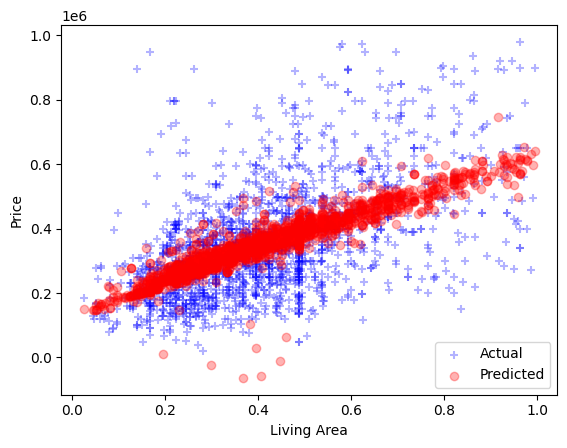

In [10]:
from src.model_functions import train_linear_regr

train_linear_regr(X, y)

## Categorical + Numerical = Linear Regression --> score 0.58


In [11]:
# including Locality to see if any difference ==> LOCALITY HAS NEGATIVE INFLUENCE7
# Included poistcode - negative influence on the models overall
cat_cols = ['property_type','property_subtype','kitchen','building_state','region','province']
numerical_cols = ['price','number_rooms', 'living_area', 'surface_land', 'number_facades','latitude','longitude']

dummies = pd.get_dummies(df[cat_cols], columns=cat_cols)

new_df = pd.concat([df[numerical_cols], dummies], axis=1)
new_df

,price,number_rooms,living_area,surface_land,number_facades,latitude,longitude,property_type_APARTMENT,property_type_HOUSE,property_subtype_APARTMENT,...,province_Brussels,province_East Flanders,province_Flemish Brabant,province_Hainaut,province_Limburg,province_Liège,province_Luxembourg,province_Namur,province_Walloon Brabant,province_West Flanders
0,698000.0,3.0,200.0,600.0,4.0,50.846557,4.351697,False,True,False,...,True,False,False,False,False,False,False,False,False,False
1,650000.0,4.0,270.0,713.0,4.0,50.846557,4.351697,False,True,False,...,True,False,False,False,False,False,False,False,False,False
2,499000.0,4.0,155.0,210.0,2.0,50.846557,4.351697,False,True,False,...,True,False,False,False,False,False,False,False,False,False
3,385000.0,2.0,88.0,0.0,3.0,50.846557,4.351697,True,False,True,...,True,False,False,False,False,False,False,False,False,False
4,365000.0,5.0,134.0,0.0,2.0,50.846557,4.351697,True,False,True,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10437,590000.0,4.0,297.0,742.0,4.0,51.208887,3.445221,False,True,False,...,False,True,False,False,False,False,False,False,False,False
10438,269000.0,2.0,186.0,169.0,2.0,51.208887,3.445221,False,True,False,...,False,True,False,False,False,False,False,False,False,False
10439,370000.0,3.0,146.0,1215.0,4.0,51.208887,3.445221,False,True,False,...,False,True,False,False,False,False,False,False,False,False
10440,335000.0,4.0,260.0,870.0,4.0,51.208887,3.445221,False,True,False,...,False,True,False,False,False,False,False,False,False,False


Mean absolute error TEST = 81351.5961

Mean squared error TEST = 12297112277.8925

Median absolute error TEST = 62936.0

Explain variance score TEST = 0.5807

R2 score *coefficient of Determination TEST = 0.5806

--------------------------------------
TRAINING SCORE: 0.5798523419274266
TESTING SCORE: 0.5806381257581426
--------------------------------------
Cross validation scores: 
 [ 5.42733466e-01  5.46934876e-01  5.89128376e-01  5.53159927e-01
  5.90421359e-01  5.63165105e-01 -2.16531184e+20  5.72792017e-01
  6.10080083e-01  5.62182127e-01]


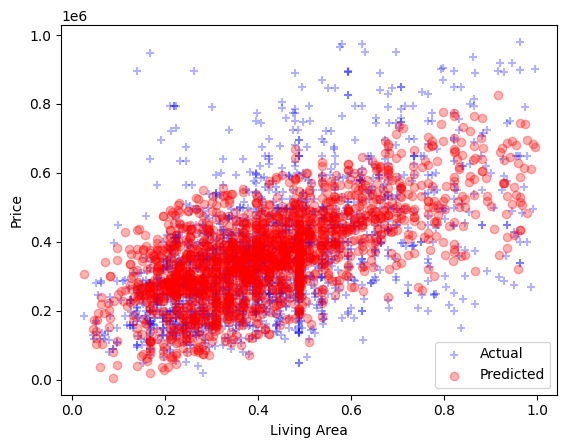

In [12]:
from src.model_functions import train_linear_regr

X = new_df.drop(columns=['price'], axis=1)
y = df['price']

#Training the Linear Model (LinearRegression) - and normalize the data with MinMaxScaler
train_linear_regr(X, y)

## Model K-Nearest Neighbour --> score: 0.58

In [13]:
from src.model_functions import train_knn_regr

X = new_df.drop(columns=['price'], axis=1)
y = df['price']

Scores for the initial training (Without GridSearch)
Mean absolute error TEST = 79303.6747

Mean squared error TEST = 12167573648.1736

Median absolute error TEST = 58857.1429

Explain variance score TEST = 0.5866

R2 score *coefficient of Determination TEST = 0.5851

--------------------------------------
TRAINING SCORE: 0.6218273497899057
TESTING SCORE: 0.5850557126938418
--------------------------------------
Cross validation scores: 
 [0.50612866 0.58550863 0.57924228 0.55772179 0.59536377 0.48035004
 0.53537642 0.53644047 0.60496421 0.53936161]


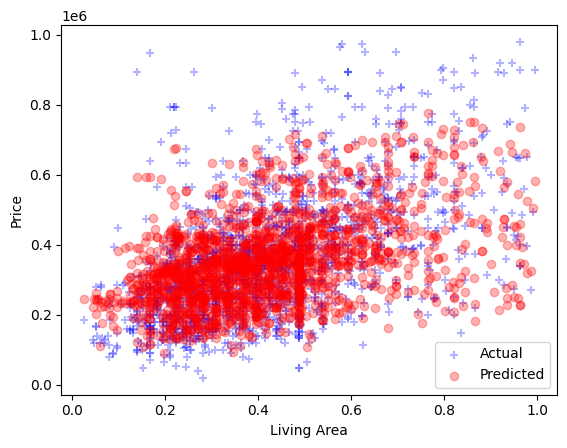

In [14]:
# Train the model (KNeighborsRegressor) with n_neighbors as 14 (see gridsearch below- best ne niegnbours)
params = {'n_neighbors':14}
print("Scores for the initial training (Without GridSearch)")
model, X_train, X_test, y_train, y_test = train_knn_regr(X, y, **params)

# implementing GridSearch
# Check for the best n_neighbor and other hyperparameters

# from sklearn.model_selection import GridSearchCV

# params = {"n_neighbors": np.arange(10,15), 
#           "metric": ["euclidean", "cityblock"],
#           "weights":['uniform', 'distance'],
#           "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute']}

# print('Calculating best parameters through GridSearchCV. . .')
# grid = GridSearchCV(estimator=model,param_grid=params)
# grid.fit(X_train, y_train)
# print(f'Best score: {grid.best_score_}')

# # Retrain the model with the optimal parameters

# best_params = grid.best_estimator_.get_params()
# print(f"The Best parameters found from GridSearchCV: {best_params}")

# model, X_train, X_test, y_train, y_test = train_knn_regr(X, y, **best_params)


## Polynomial regresssion (NOT useful if degree > 1) --> score: 0.58

Mean absolute error TEST = 81388.4431

Mean squared error TEST = 12293731981.4246

Median absolute error TEST = 63160.0

Explain variance score TEST = 0.5808

R2 score *coefficient of Determination TEST = 0.5808

--------------------------------------
TRAINING SCORE: 0.5797632268322961
TESTING SCORE: 0.5807534022092531
--------------------------------------
Cross validation scores: 
 [ 5.42627591e-01  5.47128380e-01  5.89618518e-01  5.53146325e-01
  5.89812935e-01  5.63183285e-01 -6.97725376e+19  5.72385604e-01
  6.10106353e-01  5.61662743e-01]


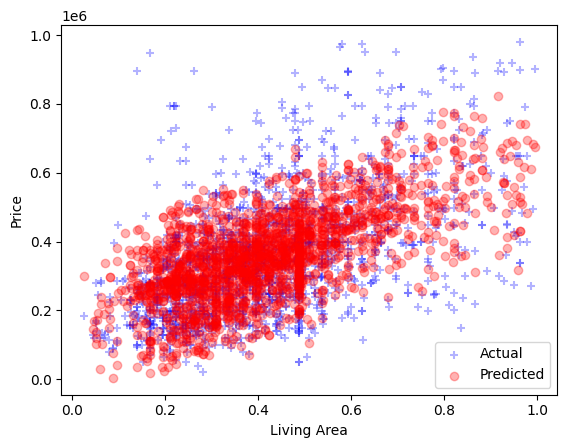

In [15]:
from src.model_functions import train_polynomial_regr

X = new_df.drop(columns=['price'], axis=1)
y = df['price']

degree = 1
train_polynomial_regr(X, y, degree)

## Huberregressor --> score: 0.57

Mean absolute error TEST = 79367.9613

Mean squared error TEST = 12555310794.4747

Median absolute error TEST = 59735.0762

Explain variance score TEST = 0.5765

R2 score *coefficient of Determination TEST = 0.5718

--------------------------------------
TRAINING SCORE: 0.5656109149823432
TESTING SCORE: 0.5718329191865958
--------------------------------------
Cross validation scores: 
 [0.53202622 0.53345899 0.5764177  0.54958728 0.56803282 0.54200913
 0.5562657  0.57200397 0.61051626 0.55383638]


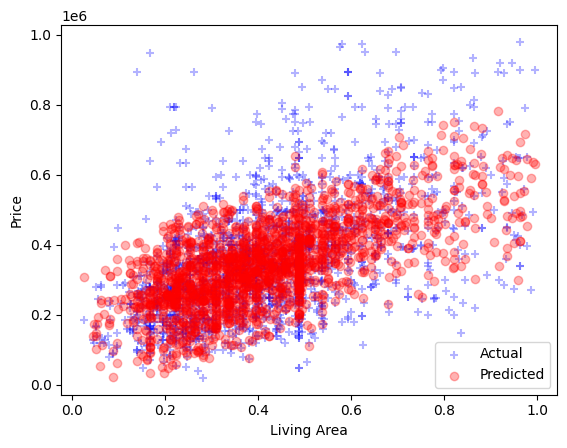

In [16]:
from src.model_functions import train_huberregressor

train_huberregressor(X,y)

## Decision Tree Regressor (sklearn.tree.DecisionTreeRegressor) --> score: 0.56

Mean absolute error TEST = 73674.5158

Mean squared error TEST = 12847720595.4676

Median absolute error TEST = 50000.0

Explain variance score TEST = 0.5623

R2 score *coefficient of Determination TEST = 0.5619

--------------------------------------
TRAINING SCORE: 0.9993332932162652
TESTING SCORE: 0.561861023393504
--------------------------------------
Cross validation scores: 
 [0.49007499 0.49331444 0.52385808 0.56774388 0.52007634 0.51258728
 0.51987576 0.49655001 0.46474241 0.47474278]


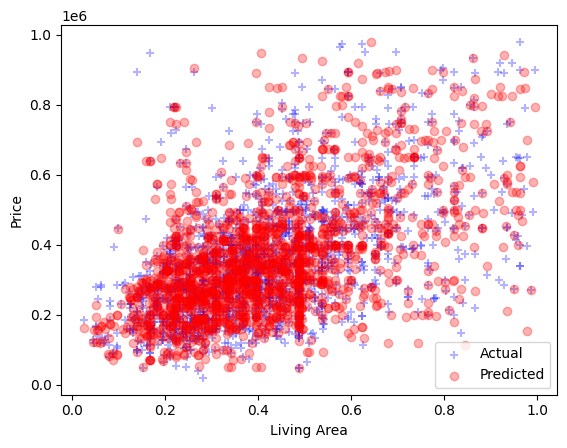

In [17]:
from src.model_functions import train_decessiontree_regression

X = new_df.drop(columns=['price'], axis=1)
y = df['price']

train_decessiontree_regression(X, y)

## XGBOOST Regression --> score: 0.7972

Mean absolute error TEST = 54885.9907

Mean squared error TEST = 5845267189.5407

Median absolute error TEST = 39387.2656

Explain variance score TEST = 0.8035

R2 score *coefficient of Determination TEST = 0.8034

--------------------------------------
TRAINING SCORE: 0.9310402886305642
TESTING SCORE: 0.8034376727713815
--------------------------------------
Cross validation scores: 
 [0.74928108 0.75056096 0.76551827 0.75152203 0.80326452 0.75630356
 0.74491564 0.78125817 0.73967731 0.72692145]


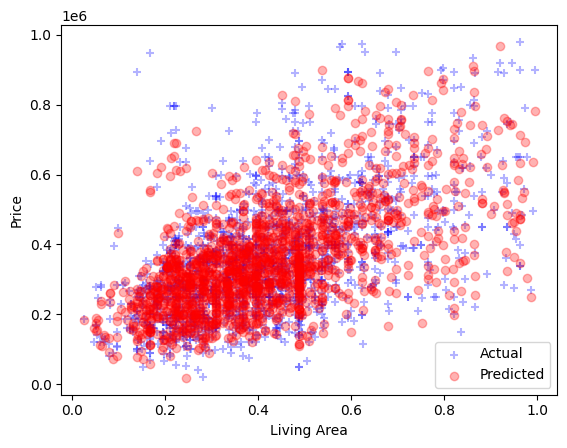

In [18]:
from src.model_functions import train_XGBoost_regression

train_XGBoost_regression(X, y)


# Training Several Different Linear Models (Dataset split -Houses and Apartments)

### Linear Regression

In [19]:
import matplotlib.pyplot as plt
new_df.columns

df_house = new_df[new_df['property_type_HOUSE'] == 1]
df_app = new_df[new_df['property_type_APARTMENT'] == 1]

Mean absolute error TEST = 59820.5286

Mean squared error TEST = 7440554949.7951

Median absolute error TEST = 40971.3281

Explain variance score TEST = 0.7609

R2 score *coefficient of Determination TEST = 0.7608

--------------------------------------
TRAINING SCORE: 0.9456457539296447
TESTING SCORE: 0.7608427061758977
--------------------------------------
Cross validation scores: 
 [0.7626534  0.78068538 0.74327949 0.77171942 0.79666323 0.77542566
 0.77471706 0.76724273 0.75806482 0.79102736]


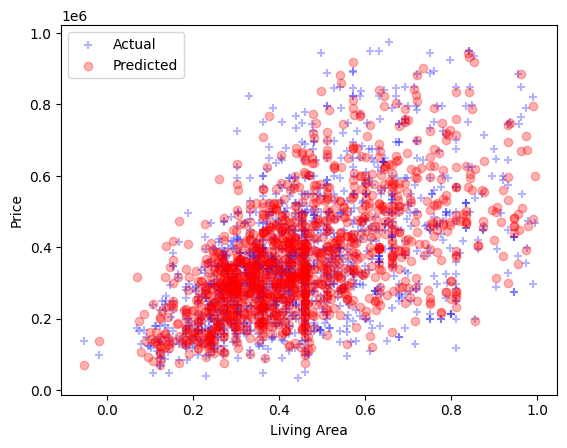

In [20]:
# HOUSE PREDICTIONS
from src.model_functions import train_XGBoost_regression

X = df_house.drop(columns=['price'], axis=1)
y = df_house['price']

train_XGBoost_regression(X, y)

Mean absolute error TEST = 50910.9978

Mean squared error TEST = 6467832544.3885

Median absolute error TEST = 30830.8203

Explain variance score TEST = 0.7109

R2 score *coefficient of Determination TEST = 0.7109

--------------------------------------
TRAINING SCORE: 0.985156908241426
TESTING SCORE: 0.7108958894027468
--------------------------------------
Cross validation scores: 
 [0.75530291 0.5759087  0.68789167 0.65860443 0.80743173 0.7009887
 0.75347213 0.749243   0.76952    0.74819887]


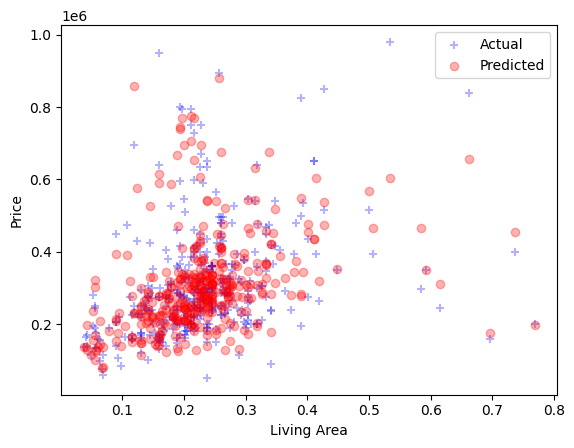

In [21]:
# APARTMENT PREDICTIONS
from src.model_functions import train_XGBoost_regression

X = df_app.drop(columns=['price'], axis=1)
y = df_app['price']

train_XGBoost_regression(X, y)